# Successful trials  

1000 bodies: ./treecode in=treecode_in.txt out=treecode_out.txt dtime=3.512e-4 eps=0.001 theta=0.1 tstop=1 dtout=3.512e-3
with $\textbf{no}$ repetition  
4096 bodies: ./treecode in=treecode_in.txt out=treecode_out4096.txt dtime=3.471e-4 eps=0.001 theta=0.1 tstop=0.05 dtout=0.00017
with $\textbf{one}$ repetition  
5000 bodies: ./treecode in=treecode_in.txt out=treecode_out5000N.txt dtime=0.00035 eps=0.001 theta=0.1 tstop=0.5 dtout=0.0017
with $\textbf{no}$ repetition  
5000 bodies: ./treecode in=treecode_in.txt out=treecode_out5000N.txt dtime=0.00035 eps=0.1 theta=0.1 tstop=0.5 dtout=0.0017

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
import math
from matplotlib.animation import FuncAnimation

# Reading from the output file

In [2]:
N = 5000

# Counting the number of steps 

n_outputs = 0

with open("treecode_out5000N.txt", "r") as file:
    for line in file:
        if line.strip() == str(N):
            n_outputs += 1
            
print(n_outputs) 

295


In [3]:
# Reading times

data_time = np.empty(n_outputs)
with open("treecode_out5000N.txt", "r") as file:
    index = 0
    for _ in range(n_outputs):
        for i in range(2):
            file.readline()
        
        data_iter_t = np.genfromtxt(file, max_rows=1)
        data_time[index] = data_iter_t
        index += 1
        
        for _ in range(3*N):
            file.readline()

In [5]:
# Reading masses from the output

#data_mass = np.empty(N*n_outputs)
data_mass = []

with open("treecode_out5000N.txt", "r") as file:
    index = 0
    for _ in range(n_outputs):
        for i in range(3):
            file.readline()
        
        data_iter_m = np.genfromtxt(file, max_rows=N)
        data_mass[index:index+N] = data_iter_m
        index += N
        
        for _ in range(2*N):
            file.readline()
            

In [6]:
# Reading coordinates and velocities from the output

data_coordinates = []
data_velocities = []

with open("treecode_out5000N.txt", "r") as file:
    for _ in range(n_outputs):
        for _ in range(3+N):
            file.readline()
            
        data_iter_c = np.genfromtxt(file, usecols = range(0,3), delimiter = '', max_rows=N)
        data_coordinates.append(data_iter_c)
        data_iter_v = np.genfromtxt(file, usecols = range(0,3), delimiter = '', max_rows=N)
        data_velocities.append(data_iter_v)
        
data_coordinates = np.concatenate(data_coordinates)
data_velocities = np.concatenate(data_velocities)

In [7]:
x = np.zeros(shape = len(data_coordinates))
y = np.zeros(shape = len(data_coordinates))
z = np.zeros(shape = len(data_coordinates))

vx = np.zeros(shape = len(data_velocities))
vy = np.zeros(shape = len(data_velocities))
vz = np.zeros(shape = len(data_velocities))

for i in range(len(data_coordinates)):
    x[i] = data_coordinates[i][0]
    y[i] = data_coordinates[i][1]
    z[i] = data_coordinates[i][2]
    
for i in range(len(data_velocities)):
    vx[i] = data_velocities[i][0]
    vy[i] = data_velocities[i][1]
    vz[i] = data_velocities[i][2]

# 3D Plot

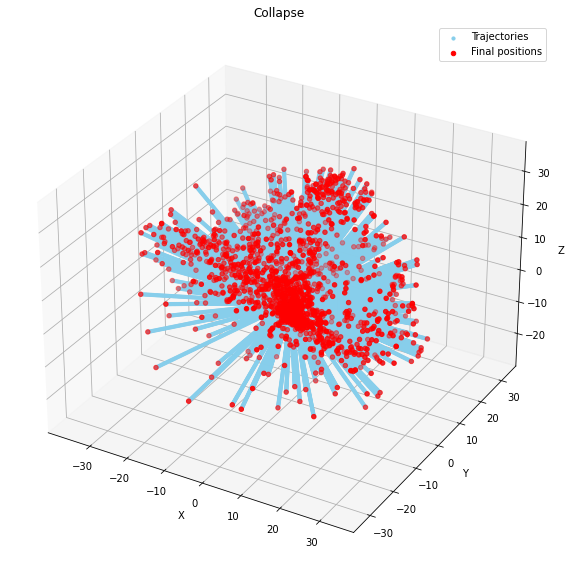

In [35]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection="3d")
ax.scatter(x, y, z, color='skyblue', s=10, label = 'Trajectories')
#ax.scatter(x[:N], y[:N], z[:N], color='blue')
ax.scatter(x[-N:], y[-N:], z[-N:], color='red', label = 'Final positions')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Collapse')
ax.legend()
plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


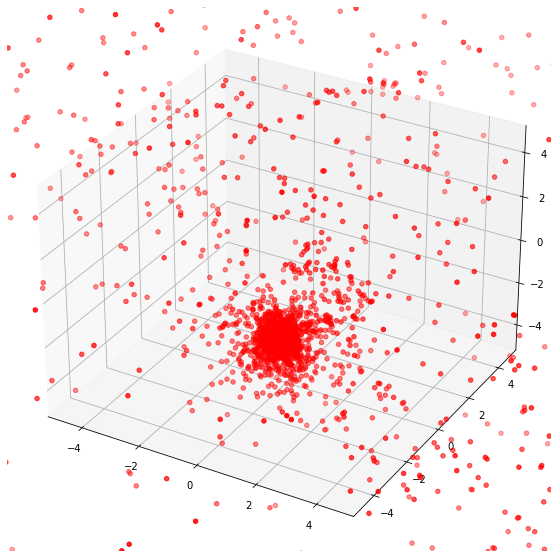

In [9]:
num_frames = len(data_coordinates) // N

def update(frame):
    start_idx = frame * N
    end_idx = (frame + 1) * N
    scat._offsets3d = (x[start_idx:end_idx], y[start_idx:end_idx], z[start_idx:end_idx])
    return scat,

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

scat = ax.scatter(x[:len(data_coordinates)], y[:len(data_coordinates)], z[:len(data_coordinates)], c='r', marker='o')

#ax.set_xlim(np.min(x), np.max(x))
#ax.set_ylim(np.min(y), np.max(y))
#ax.set_zlim(np.min(z), np.max(z))

ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_zlim(-5, 5)

ani = FuncAnimation(fig, update, frames=num_frames, interval=200)
ani.save('5000bodies.gif', writer='imagemagick', fps=10)

plt.show()

Text(0, 0.5, 'j-particle position')

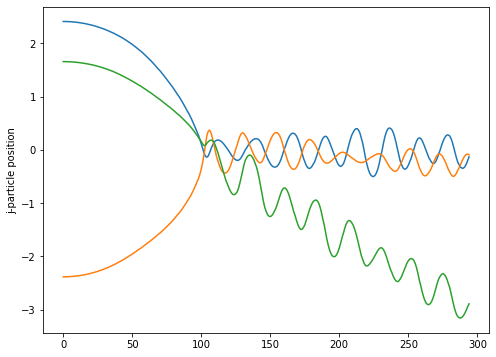

In [18]:
xp = np.zeros(shape=n_outputs)
yp = np.zeros(shape=n_outputs)
zp = np.zeros(shape=n_outputs)

for i in range(n_outputs):
    xp[i] = x[150+i*N]
    yp[i] = y[150+i*N]
    zp[i] = z[150+i*N]

plt.figure(figsize=(8,6))
plt.plot(xp)
plt.plot(yp)
plt.plot(zp)
plt.ylabel('j-particle position')

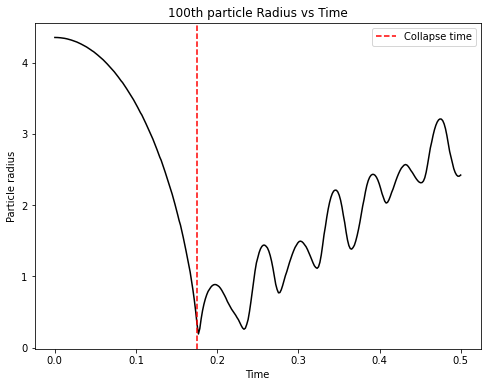

In [19]:
r_p1 = np.zeros(n_outputs)
for i in range(n_outputs):
    r_p1[i] = np.sqrt(x[100+i*N]**2 + y[100+i*N]**2 + z[100+i*N]**2)

time = np.linspace(0, 0.5, len(r_p1))
plt.figure(figsize=(8,6))
plt.plot(time, r_p1, color='black')
plt.axvline(0.175, color='red', linestyle='dashed', label='Collapse time')
plt.xlabel('Time')
plt.ylabel('Particle radius')
plt.title('100th particle Radius vs Time')
plt.legend()
plt.show()

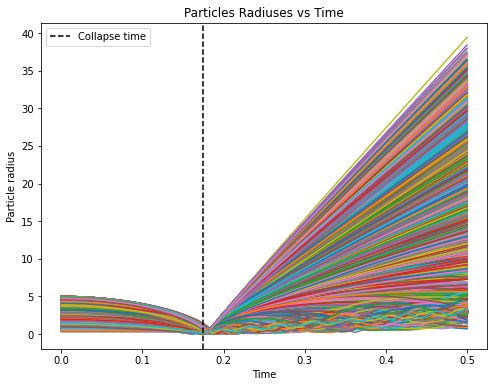

In [32]:
r_ptot = []
for j in range(N):
    r_part = np.zeros(n_outputs)
    
    for i in range(n_outputs):
        r_part[i] = np.sqrt(x[j+i*N]**2 + y[j+i*N]**2 + z[j+i*N]**2)
    r_ptot.append(r_part)

time = np.linspace(0, 0.5, n_outputs)
plt.figure(figsize=(8,6))
for i in range(N):
    plt.plot(time, r_ptot[i])
plt.axvline(0.175, color='black', linestyle='dashed', label='Collapse time')
plt.xlabel('Time')
plt.ylabel('Particle radius')
plt.title('Particles Radiuses vs Time')
plt.legend()
plt.show()

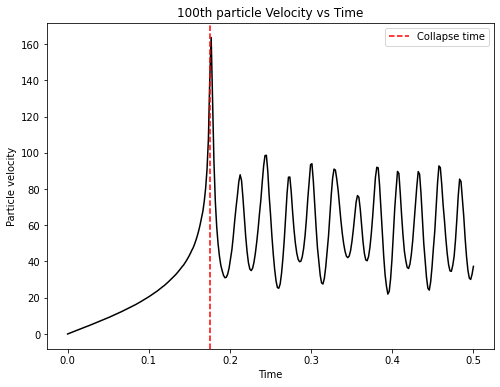

In [22]:
v_p1 = np.zeros(n_outputs)
for i in range(n_outputs):
    v_p1[i] = np.sqrt(vx[100+i*N]**2 + vy[100+i*N]**2 + vz[100+i*N]**2)
    
time = np.linspace(0, 0.5, len(v_p1))
plt.figure(figsize=(8,6))
plt.plot(time, v_p1, color='black')
plt.axvline(0.175, color='red', linestyle='dashed', label='Collapse time')
plt.xlabel('Time')
plt.ylabel('Particle velocity')
plt.title('100th particle Velocity vs Time')
plt.legend()
plt.show()

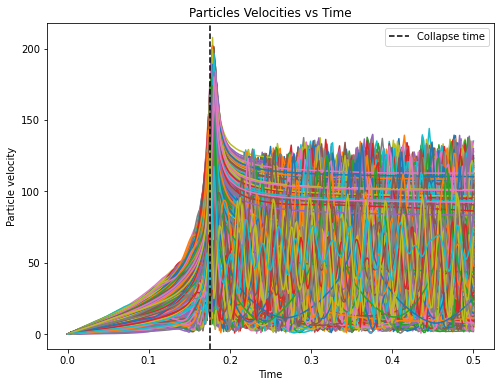

In [24]:
v_ptot = []
for j in range(N):
    v_p = np.zeros(n_outputs)
    
    for i in range(n_outputs):
        v_p[i] = np.sqrt(vx[j+i*N]**2 + vy[j+i*N]**2 + vz[j+i*N]**2)
    
    #r_p.sort()
    #r_p = r_p[::-1]
    v_ptot.append(v_p)

time = np.linspace(0, 0.5, n_outputs)
plt.figure(figsize=(8,6))
for i in range(N):
    plt.plot(time, v_ptot[i])
plt.axvline(0.175, color='black', linestyle='dashed', label='Collapse time')
plt.xlabel('Time')
plt.ylabel('Particle velocity')
plt.title('Particles Velocities vs Time')
plt.legend()
plt.show()

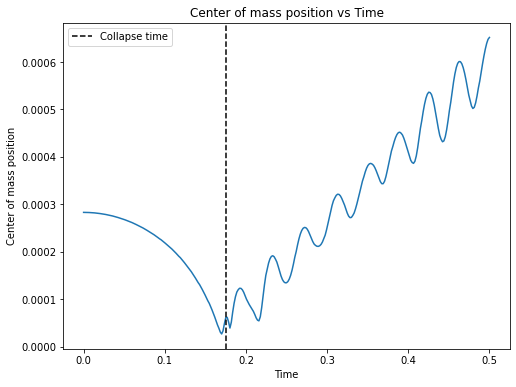

In [33]:
# Center of mass' motion
m=1
r_com = []
for j in range(N):
    r_com_ndx = np.zeros(n_outputs)
    
    for i in range(n_outputs):
        r_com_ndx[i] += r_part[i]*m / (m*N)
    
    r_com.append(r_com_ndx)

time = np.linspace(0, 0.5, n_outputs)
#for i in range(N):
    #plt.plot(time, r_com[i])
plt.figure(figsize=(8,6))
plt.plot(time, r_com[100])
plt.axvline(0.175, color='black', linestyle='dashed', label='Collapse time')
plt.xlabel('Time')
plt.ylabel('Center of mass position')
plt.title('Center of mass position vs Time')
plt.legend()
plt.show()

In [25]:
print(x.shape, y.shape, z.shape, num_frames)
x_evolution = np.empty((N, num_frames))
y_evolution = np.empty((N, num_frames))
z_evolution = np.empty((N, num_frames))
v_x_evolution = np.empty((N, num_frames))
v_y_evolution = np.empty((N, num_frames))
v_z_evolution = np.empty((N, num_frames))

t = 0
n = 0
for t in range(num_frames):
    
    for n in range(N):
        #print(n)
        x_evolution[n][t] = x[n + t*N]
        y_evolution[n][t] = y[n + t*N]
        z_evolution[n][t] = z[n + t*N]
        v_x_evolution[n][t] = vx[n + t*N]
        v_y_evolution[n][t] = vy[n + t*N]
        v_z_evolution[n][t] = vz[n + t*N]
        
print(x.shape)

(1475000,) (1475000,) (1475000,) 295
(1475000,)


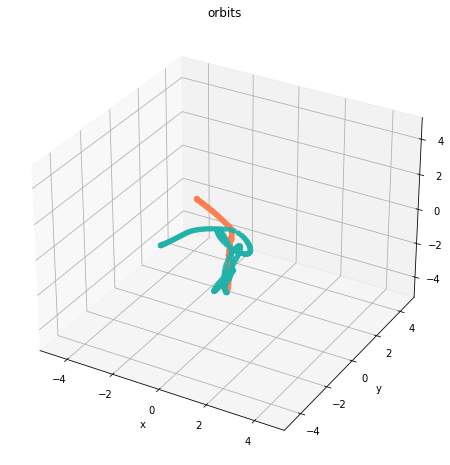

In [26]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')

#IF I WANT POINTS:

ax.scatter(x_evolution[0][:],y_evolution[0][:],z_evolution[0][:], color = 'lightseagreen')
ax.scatter(x_evolution[1][:],y_evolution[1][:], z_evolution[1][:], color = 'coral')

#IF I WANT THE PLOT OF THE ORBITS
ax.plot(x_evolution[0], y_evolution[0], z_evolution[0], label='1', color = 'lightblue')
ax.plot(x_evolution[1], y_evolution[1], z_evolution[1], label='2', color = 'lightsalmon')
#plt.plot(x3, y3, label='3', color = 'blue')


ax.set_title('orbits')
ax.set_xlabel('x')
ax.set_ylabel('y')
#plt.gca().set_aspect('equal', adjustable='box')
#ax.grid(True)
#ax.legend()
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_zlim(-5,5)

plt.show()

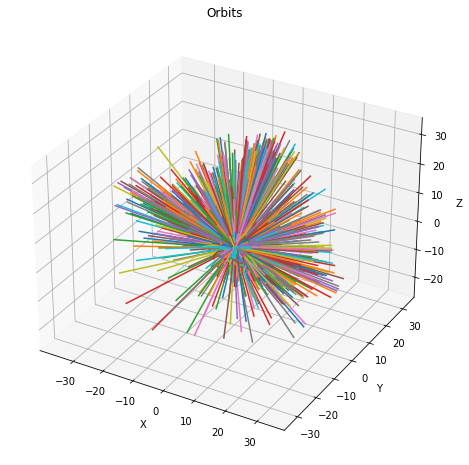

"\nplt.figure(figsize=(10, 8))\n\nfor n in range(n_bodies):\n    #IF I WANT POINTS:\n    #plt.scatter(x[n][:],y[n][:])\n    #IF I WANT THE PLOT OF THE ORBITS\n    plt.plot(x[n], y[n])\n\nplt.title('orbits')\nplt.xlabel('x')\nplt.ylabel('y')\n#plt.gca().set_aspect('equal', adjustable='box')\nplt.grid(True)\n#plt.legend()\nplt.show()\n"

In [27]:
#ALL THE ORBITS


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for orbit_x, orbit_y, orbit_z in zip(x_evolution, y_evolution, z_evolution):
    ax.plot(orbit_x, orbit_y, orbit_z)

ax.set_title('Orbits')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


'''
plt.figure(figsize=(10, 8))

for n in range(n_bodies):
    #IF I WANT POINTS:
    #plt.scatter(x[n][:],y[n][:])
    #IF I WANT THE PLOT OF THE ORBITS
    plt.plot(x[n], y[n])

plt.title('orbits')
plt.xlabel('x')
plt.ylabel('y')
#plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
#plt.legend()
plt.show()
'''

(5000, 295)


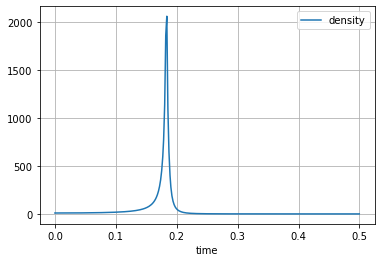

In [28]:
#I want to do a matrix with the radii of each n particle at each time
#x[0][:] is all the positions of the body 0

#print(x[0][:])
#print((x[0][:])**2)
#print((x**2).shape)
r_evolution = np.empty((N, num_frames))
r_evolution = np.sqrt(x_evolution**2 + y_evolution**2 + z_evolution**2)
print(r_evolution.shape)
#external r for each timelapse.... NON MI CONVINCE TROPPO USARE QUESTO PER LA DENSITÀ... PERCHÈ MI PRENDE LA PARTICELLE CHE SCAPPANO
r_ext = np.max(r_evolution, axis = 0)
r_mean = np.mean(r_evolution, axis = 0)
rho_evolution = N * data_mass[0] / (4/3 * np.pi * (r_ext)**3 )

#plt.plot(data_time, r_ext, label = 'external radius')
#plt.plot(data_time, r_mean, label = 'mean radius')
plt.plot(data_time, rho_evolution, label = 'density')
plt.xlabel("time")
#plt.ylabel("radius")
plt.legend()
plt.grid()
#plt.show()


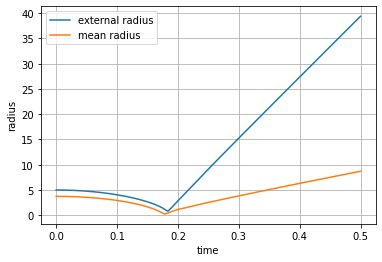

In [29]:
plt.plot(data_time, r_ext, label = 'external radius')
plt.plot(data_time, r_mean, label = 'mean radius')
plt.xlabel("time")
plt.ylabel("radius")
plt.legend()
plt.grid()

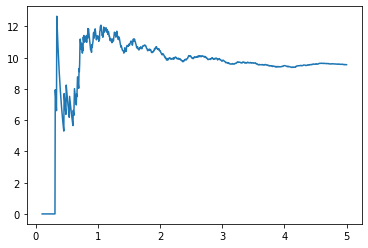

4.9996298116851925


In [30]:
#let's do the first one first
radii = np.linspace(0.1, r_ext[0], 1000)
density= []
for R in radii:
    i = 0
    for r_p in r_evolution[:,0]:    
        if (r_p <= R):
            i = i+1
    density.append(i * data_mass[0] / (4/3 * np.pi * R**3)) 
#plt.hist(density,int(n_bodies**0.5))
plt.show()
plt.plot(radii, density)

plt.show()
print(r_ext[0])

# we count them, so for a litte number of particles might scatter the distributionn because of the poissonian error ( proportinal to sqrt(N))